# Text Reading and Segment

In [72]:
import numpy as np
import jieba
import jieba.posseg as pseg
import re

In [73]:
with open('101Matthew.htm', 'r') as f1:
    data = list(f1)
f1.close()
with open('102Mark.htm', 'r') as f2:
    data += list(f2)
f2.close()
with open('103Luke.htm', 'r') as f3:
    data += list(f3)
f3.close()
with open('104John.htm', 'r') as f4:
    data += list(f4)
f4.close()

In [74]:
for s in data:
    print(len(s))

17
7
7
68
20
34
68
47
51
53
32
14
29
21
44
44
43
41
34
67
2
10
8
25
23
30
72
30
72
30
72
30
72
41
33
9
45
23
23
23
23
23
23
23
23
23
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
10
25
78
15
8
30
25
25
25
25
25
25
25
25
25
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
9
9
23
60
23
49
23
53
23
46
23
54
49
23
45
23
47
23
45
23
46
24
47
49
24
51
24
51
24
51
24
43
24
47
49
24
57
24
81
24
70
24
55
24
87
49
24
61
24
46
24
71
24
50
24
65
49
25
78
15
8
30
25
25
25
25
25
25
25
25
25
27
27
27
27
27
27
27
27
27
27
27
27
27
27
9
9
23
60
23
55
23
51
23
52
23
47
49
23
76
23
50
23
64
23
73
24
39
49
24
71
24
56
24
89
24
47
24
67
49
24
86
24
39
24
63
24
51
24
60
49
24
47
24
71
24
65
25
78
15
8
30
25
25
25
25
25
25
25
25
25
27
27
27
27
27
27
27
27
9
9
23
47
23
36
23
64
23
49
23
57
49
23
41
23
71
23
41
23
70
24
56
49
24
82
24
59
24
51
24
52
24
64
49
24
69
24
46
25
78
15
8
30
25
25
25
25
25
25
25
25
25
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
9
9
23
44
23
38
23
59
23
64
23
49
49
23
81


In [75]:
sentences = list()
for i in range(len(data)):
    data[i] = re.sub(r'[<>『』(）《*/"=!@#$:.？…、“，\n”‘’: |[-]|\u3000]|[a-zA-Z0-9]|[\u3000]', r'', data[i])
    data[i]=re.split('。', data[i])
    for element in data[i]:
        if element == '':
            data[i].remove(element)
    sentences += data[i]
len(sentences)

4282

In [76]:
sentences

['\ufeff',
 ';',
 '馬太福音',
 '聖經繁體和合本馬太福音',
 '聖經繁體和合本,馬太福音,',
 ',',
 '{%}',
 ';',
 '){',
 ';',
 ')',
 ',);',
 ',);',
 ',);',
 ')',
 '{)]);}',
 '}',
 '&;&;&;&;',
 "'')",
 '&;&;&;&;',
 "'')",
 '&;&;&;&;',
 "'')",
 '&;&;&;&;',
 "'')",
 '馬太福音',
 '聖經繁體和合本',
 '&;&;&;',
 '馬太福音章',
 '亞伯拉罕的後裔大衛的子孫耶穌基督的家譜．〔後裔子孫原文都作兒子下同〕',
 '亞伯拉罕生以撒．以撒生雅各．雅各生猶大和他的弟兄．',
 '猶大從他瑪氏生法勒斯和謝拉．法勒斯生希斯崙．希斯崙生亞蘭．',
 '亞蘭生亞米拿達．亞米拿達生拿順．拿順生撒門．',
 '撒門從喇合氏生波阿斯．波阿斯從路得氏生俄備得．俄備得生耶西．',
 '耶西生大衛王',
 '大衛從烏利亞的妻子生所羅門．',
 '所羅門生羅波安．羅波安生亞比雅．亞比雅生亞撒．',
 '亞撒生約沙法．約沙法生約蘭．約蘭生烏西亞．',
 '烏西亞生約坦．約坦生亞哈斯．亞哈斯生希西家．',
 '希西家生瑪拿西．瑪拿西生亞們．亞們生約西亞．',
 '百姓被遷到巴比倫的時候約西亞生耶哥尼雅和他的弟兄',
 '遷到巴比倫之後耶哥尼雅生撒拉鐵．撒拉鐵生所羅巴伯．',
 '所羅巴伯生亞比玉．亞比玉生以利亞敬．以利亞敬生亞所．',
 '亞所生撒督．撒督生亞金．亞金生以律．',
 '以律生以利亞撒．以利亞撒生馬但．馬但生雅各．',
 '雅各生約瑟就是馬利亞的丈夫．那稱為基督的耶穌是從馬利亞生的',
 '這樣從亞伯拉罕到大衛共有十四代．從大衛到遷至巴比倫的時候也有十四代．從遷至巴比倫的時候到基督又有十四代',
 '耶穌基督降生的事記在下面．他母親馬利亞已經許配了約瑟還沒有迎娶馬利亞就從聖靈懷了孕',
 '他丈夫約瑟是個義人不願意明明的羞辱他想要暗暗的把他休了',
 '正思念這事的時候有主的使者向他夢中顯現說大衛的子孫約瑟不要怕只管娶過你的妻子馬利亞來．因他所懷的孕是從聖靈來的',
 '他將要生一個兒子．你要給他起名叫耶穌．因他要將自己的百姓從罪惡裡救出來',
 '這一切的事成就是要應驗主藉先知

In [78]:
sent_seg = list()
jieba.set_dictionary('dict.txt.big')

for i in range(len(sentences)):
    s = sentences[i]
    sent_seg.append(list(jieba.cut(s)))
sent_seg = np.array(sent_seg)
sent_seg.shape, sent_seg[111]

Building prefix dict from /mnt/hgfs/進階軟體開發專題/NLP/dict.txt.big ...
Loading model from cache /tmp/jieba.u1ad5655d51ba17ccc0ad09208c097d82.cache
Loading model cost 1.688 seconds.
Prefix dict has been built succesfully.


((4282,), ['於是', '魔鬼', '離', '了', '耶穌', '有', '天使', '來', '伺候', '他'])

In [79]:
voca_count = dict()
for i in sent_seg:
    for j in i:
        if j in voca_count:
            voca_count[j] += 1
        else:
            voca_count[j] = 1
len(list(voca_count.keys()))

6305

In [80]:
sent_seg[0]

['\ufeff']

In [81]:
import gensim as g
model = g.models.Word2Vec(sent_seg, window=5, size=1024, max_vocab_size=15000, min_count=1, iter=5)

In [82]:
word2vec = dict()
vec = list()
vocas = list()
for voca in model.wv.vocab.keys():
    word2vec[voca] = model.wv.word_vec(voca)
    vocas.append(voca)
    vec.append(model.wv.word_vec(voca))
word2vec['<unknown>'] = np.zeros_like(word2vec['小心'])

np.save('word2vec_gensim', word2vec)

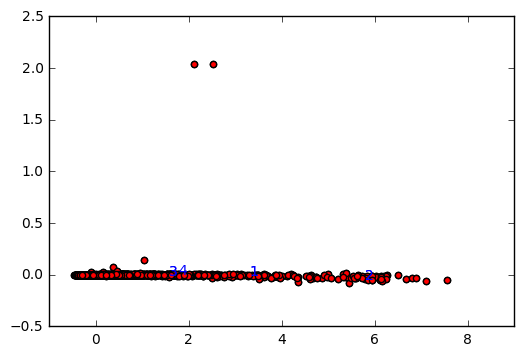

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v = np.array(vocas)
pca = PCA(n_components=2)
vec_pca = pca.fit_transform(vec)

plt.figure(0)
plt.scatter(vec_pca[:, 0], vec_pca[:, 1], c='r')
vec_pca = list(vec_pca)
v11 = vec_pca[np.argwhere(v=='彼得')[0][0]]
plt.text(x=v11[0], y=v11[1], s='1', color='b')
v12 = vec_pca[np.argwhere(v=='耶穌')[0][0]]
plt.text(x=v12[0], y=v12[1], s='2', color='b')
v21 = vec_pca[np.argwhere(v=='摩西')[0][0]]
plt.text(x=v21[0], y=v21[1], s='3', color='b')
v22 = vec_pca[np.argwhere(v=='天國')[0][0]]
plt.text(x=v22[0], y=v22[1], s='4', color='b')
plt.show()

In [85]:
np.mean(word2vec['神']), np.std(word2vec['神'])

(-0.0015688714, 0.16011584)

In [86]:
# books vectors
books_vec = list()
for i in range(len(sent_seg)):
    s = list()
    for j in range(len(sent_seg[i])):
        if sent_seg[i][j] in word2vec:
            vec = word2vec[sent_seg[i][j]]
        else:
            vec = word2vec['<unknown>']
        s.append(list(vec))
    books_vec.append(s)
#romance_vec = np.array(romance_vec)
#np.save('romance_vec_gensim', romance_vec)

In [88]:
type(books_vec), type(books_vec[0]), type(books_vec[0][0])

(list, list, list)

In [89]:
books_vec[0]

[[0.00046437062,
  -0.00017070054,
  -0.0002835897,
  -2.252818e-05,
  -7.8251855e-05,
  -5.7564659e-05,
  -0.00027430919,
  -0.00033326267,
  9.4346477e-05,
  0.00036777218,
  -0.00016215802,
  0.00037981113,
  0.00022469937,
  0.00045492299,
  0.0003806215,
  -0.00015246731,
  0.0001198559,
  0.00016611705,
  0.00040792595,
  -0.00010963169,
  3.3077533e-05,
  -0.00026130077,
  0.00023115768,
  0.00040688424,
  -0.00043173257,
  -8.2906357e-05,
  1.8093508e-05,
  0.00031491558,
  0.0004368544,
  0.00012192847,
  0.00014884838,
  -0.00019762994,
  0.00039323256,
  0.00042877256,
  0.00015683775,
  -0.00038413433,
  -4.6144014e-06,
  -7.4366842e-05,
  0.00040968487,
  0.00015676016,
  0.00043184625,
  0.00043703491,
  0.0003350348,
  0.00023169437,
  -0.00018184113,
  4.2977739e-05,
  8.5633648e-05,
  -1.3060905e-05,
  0.00034592918,
  -0.00043785467,
  0.00047420786,
  0.00025263376,
  -0.00033571926,
  -0.00022910582,
  0.00036613204,
  0.00017530918,
  1.9740415e-05,
  -2.8138178e-0

/bin/sh: 1: nvidia-smi: not found


['凡',
 '在',
 '人',
 '面前',
 '認',
 '我',
 '的',
 '我',
 '在',
 '我',
 '天上',
 '的',
 '父',
 '面前',
 '也',
 '必認',
 '他']